#### The data here we using is prepocessed in feature engineering notbook here we just fitting the model

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df=pd.read_csv('heart_clean')

In [3]:
df.head()

,age,sex,cp,restecg,exng,slp,caa,thall,oldpeak_sqrt,thalachh_boxcox,chol_boxcox,trtbps_boxcox,output
0,0.592593,0.0,1.0,-1.0,0.0,-1.0,0.0,-1.0,0.491851,-0.093596,-0.112716,0.680371,1
1,-1.333333,0.0,0.5,0.0,0.0,-1.0,0.0,0.0,0.771913,1.224258,0.154868,0.000000,1
2,-1.037037,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.228308,0.646706,-0.623238,0.000000,1
3,0.074074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.870551,-0.063957,-0.532647,1
4,0.148148,-1.0,-0.5,0.0,1.0,1.0,0.0,0.0,-0.094734,0.328684,1.447656,-0.532647,1


In [4]:
x=df.drop(['output'],axis=1)
y=df['output']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=30,stratify=df['output'])

In [6]:
#Model fitting with default parameters:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

### Predicted results:

In [7]:
y_pred=lgr.predict(x_test)

predicted probabilites: Here I will predict the probabilites of output using predict_proba function
The function predict_proba() returns a numpy array of two columns. 
The first column is the probability that target=0 and the second column is the probability that target=1 . 

In [8]:
y_pred_proba=lgr.predict_proba(x_test)

In [9]:
y_pred_proba1=pd.DataFrame(data=y_pred_proba,columns=['y_pred0','y_pred1'])

## Evalution of Model

### Accuracy Score

In [10]:
print(f"accuracy_score for train set :{lgr.score(x_train,y_train)}")
print(f"accuracy_score for test set :{lgr.score(x_test,y_test)}")

accuracy_score for train set :0.8502202643171806
accuracy_score for test set :0.8026315789473685


### checking for underfitting or overfitting

Accuracy score for train set and test set is quite comparable so there is no case of overfitting and 
it does not seems underfitting also as test accuracy is than train accuracy.
here we used default value of C=1 we can vary value of C to see the impact on accuracy and underfitting or overfitting condition

In [11]:
c_value=[0.01,0.1,10,100]

for i in c_value:
    lgr_c=LogisticRegression(C=i)
    lgr_c.fit(x_train,y_train)
    print(f"for C={i} Accuracy are")
    print(f"accuracy_score for train set :{lgr_c.score(x_train,y_train)}")
    print(f"accuracy_score for test set :{lgr_c.score(x_test,y_test)}")
    print("-----------------------------------------------------------")

for C=0.01 Accuracy are
accuracy_score for train set :0.8105726872246696
accuracy_score for test set :0.8289473684210527
-----------------------------------------------------------
for C=0.1 Accuracy are
accuracy_score for train set :0.8546255506607929
accuracy_score for test set :0.8421052631578947
-----------------------------------------------------------
for C=10 Accuracy are
accuracy_score for train set :0.8458149779735683
accuracy_score for test set :0.8157894736842105
-----------------------------------------------------------
for C=100 Accuracy are
accuracy_score for train set :0.8414096916299559
accuracy_score for test set :0.8157894736842105
-----------------------------------------------------------


observation:
   1. with more regularized model value of c=0.01 I get and underfitting model
   2. with high value of c=10,100 I get balanced model but accuracy is decreased
   3. with c=0.1 I get quite comparable accuracy score result.

### Null accuracy compare:

So, the model accuracy is 0.8502. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. 
null accuracy:it is the accuracy that could be achieved by always predicting the most frequent class. 

In [12]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [13]:
most_frequent_output=1
frequency_1=165
print(f'null_accuracy={165/(165+138)}')

null_accuracy=0.5445544554455446


I can see that my model accuracy score is 0.8502 with C=1 but null accuracy score is 0.5445, which is very less. So, I can conclude that my model is doing a very good job in predicting the class labels.
Now, based on the above analysis I can conclude that my classification model accuracy is very good. 
But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors  classifer is making.

I will do more digging .I have another tool called Confusion matrix.

### confusion matrix
confusion matrix is a technique for summarizing the performance of a classification algorithm.
Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.
it Provides
1. True Positive: True Positives occur when we predict an observation belongs to a certain class and the                        observation actually belongs to that class.
2. True Negatives:True Negatives occur when we predict an observation does not belongs to a certain class and                    the observation actually does not belongs to that class.
3. False positives: False Positives occur when we predict an observation belongs to a certain class and the                        observation actually does not belongs to that class.
4. False Negatives: False Negatives occur when we predict an observation does not belongs to a certain class                       and the observation actually does not belongs to that class.

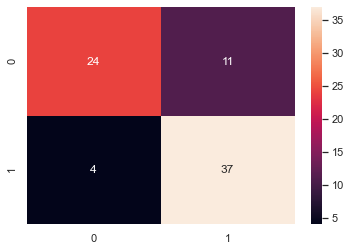

In [14]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=True,yticklabels=True)
TN=cm[0,0]
TP=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]
X= 'YTEST'
Y='YPRED'

#### Classification Accuracy & Error:

In [15]:
#Classification Accuracy:
CA=(TP+TN)/(TP+TN+FP+FN)
print(f"Classification Accuracy: {CA}") # Model classified that much percent of data accurately



#Classification Error:
CE=(FP+FN)/(TP+TN+FP+FN)
print(f"Classification Error: {CE}") # Model does not classified that much percent of data accurately

Classification Accuracy: 0.8026315789473685
Classification Error: 0.19736842105263158


### Classification Report

It is one of the performance evaluation metrics of a classification-based machine learning model. It displays  model’s precision, recall, F1 score and support.

In [16]:
print(f'classification_report:\n {classification_report(y_test,y_pred)}')

classification_report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76        35
           1       0.77      0.90      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.80        76
weighted avg       0.81      0.80      0.80        76



#### precision:
It is defined as percentage of positive outcomes of all the prdicted positive outcomes.

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the 


positive class than the negative class.
    
    
    formula: pre1=(TP/float(TP+FP))
    it provides how precisely model evaluated class labels

In [17]:
Precision=(TP/float(TP+FP))
print(f"precision for getting 1 {Precision}")


precision for getting 1 0.9024390243902439


#### Recall_score
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false 

negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Out of all the people that have the disease, how many got positive test results?
Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [18]:
recall=(TP/float(TP+FN))
print(f"recall : {recall}")



recall : 0.7708333333333334


#### specificity: Out of all the people that do not have the disease, how many got negative results?

In [19]:
specificity=(TN/float(TN+FP))
print(f"specificity: {specificity}")

specificity: 0.8571428571428571


##### Sensitivity: Out of all the people that have the disease, how many got positive test results? it is same as recall

##### f1_score
F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [20]:
F1_score=2 *( (Precision * recall) / (Precision + recall))
print(f"F1_score: {F1_score}")

F1_score: 0.8314606741573034


##### Support: Count of test data point or rows
Support is the actual number of occurrences of the class in our dataset.(value counts of target in test data set),here in our dataset

support for 0 class-35

support for 1 class-41

conclusions:
   1. High precision: 0.90 - 
   2. Low Recall
   3. High specificity
   4. high F1_score but not best :0.831

In [21]:
#### Check accuracy by adjusting thresdhold level 

In [22]:
y_pred_proba1.head(10)

,y_pred0,y_pred1
0,0.365592,0.634408
1,0.003254,0.996746
2,0.272594,0.727406
3,0.085219,0.914781
4,0.059481,0.940519
5,0.940694,0.059306
6,0.286433,0.713567
7,0.059854,0.940146
8,0.316264,0.683736
9,0.123213,0.876787


observation:
    In each row, the summation of numbers equal to 1.

    There are 2 columns which correspond to 2 class labels of target - 0 and 1.

Class 0 - predicted probability that patient doest not have heart disease.

Class 1 - predicted probability that patient has heart disease.

    Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 1 - probability of rain is predicted if probability > 0.5.

Class 0 - probability of no rain is predicted if probability < 0.5.



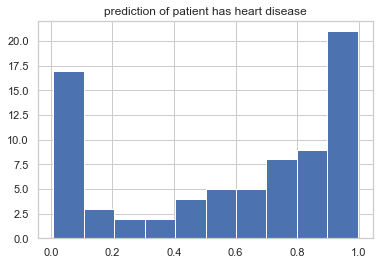

In [23]:
#histogram of prediction of patient has heart disease
import matplotlib.pyplot as plt
plt.hist(y_pred_proba1['y_pred1'],bins=10)
plt.title('prediction of patient has heart disease')
plt.show()

In [24]:
#We can check effect on  TP,FP,TN,FN By adjusting threshold level

[1.99674611 0.99674611 0.9641475  0.96294053 0.89074449 0.88308041
 0.82851102 0.82443894 0.76710653 0.75695604 0.66810468 0.65787763
 0.63658727 0.56228388 0.52586037 0.50542215 0.46968683 0.35297518
 0.33742368 0.24965269 0.22509069 0.00827602]


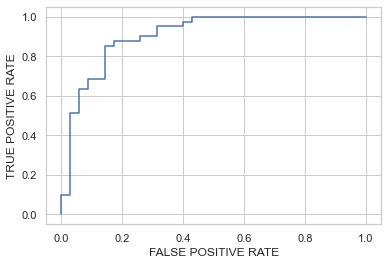

In [25]:
#### ROC_Curve
fpr,tpr,threshold=roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
print(threshold)
plt.plot(fpr,tpr)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

#### ROC_AUC Score
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
So, ROC AUC is the percentage of the ROC plot that is underneath the curve.


In [26]:
ras=roc_auc_score(y_test,lgr.predict_proba(x_test)[:,1])
print(f"ROC_AUC_SCORE: {ras}")

ROC_AUC_SCORE: 0.9066202090592335


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain to

#### Based on Feature Selection using cross validation technique:
RFECV: Recursive Feature Elimination Cross Validation

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
lgr_s=LogisticRegression()
rfecv=RFECV(estimator=lgr_s,step=1,cv=StratifiedKFold(n_splits=5),scoring='accuracy',min_features_to_select=1)
rfecv.fit(x_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [28]:
print(f"optimal features are: {rfecv.n_features_}")

optimal features are: 7


In [29]:
rfecv_x_train=rfecv.transform(x_train)
rfecv_x_test=rfecv.transform(x_test)

In [30]:
lgr_s.fit(rfecv_x_train,y_train)

LogisticRegression()

In [31]:
print(f"score on train: {lgr_s.score(rfecv_x_train,y_train)}")
print(f"score on test: {lgr_s.score(rfecv_x_test,y_test)}")

score on train: 0.8370044052863436
score on test: 0.7763157894736842


Accuracy score is reduced if i reduced the parameteres let's check with confusion matrix 

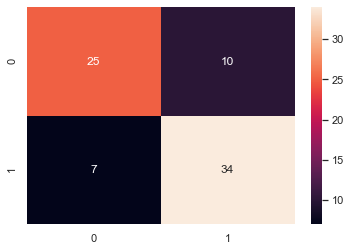

In [32]:
# Revisited confusion matrix
cm=confusion_matrix(y_test,lgr_s.predict(rfecv_x_test))
sns.heatmap(cm,annot=True,xticklabels=True,yticklabels=True)
TN=cm[0,0]
TP=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]
X= 'YTEST'
Y='YPRED'

In [33]:
#Classification Accuracy:
CA=(TP+TN)/(TP+TN+FP+FN)
print(f"Classification Accuracy: {CA}") # Model classified that much percent of data accurately



#Classification Error:
CE=(FP+FN)/(TP+TN+FP+FN)
print(f"Classification Error: {CE}") # Model does not classified that much percent of data accurately

Classification Accuracy: 0.7763157894736842
Classification Error: 0.2236842105263158


conclusion : classification accuracy is decreased and classification error is increased , our original model is performing better than this one

### Hyperparameter Tuning

In [34]:
from sklearn.model_selection import RandomizedSearchCV
lgr_h=LogisticRegression()
params={'penalty':['l1', 'l2', 'elasticnet'],
    'C':[0.01,0.1,1,10,100],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10,100,1000,10000],
    'multi_class':['auto', 'ovr', 'multinomial'],
}
cv=StratifiedKFold(5)

In [35]:
clf=RandomizedSearchCV(lgr_h,params,cv=cv,scoring='accuracy',n_jobs=-1,n_iter=100,verbose=3)

In [36]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/vaishu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.81487923 0.81478261 0.82357488        nan
 0.82792271 0.82357488        nan        nan        nan 0.77951691
 0.82357488 0.78405797        nan 0.82357488        nan 0.82357488
 0.81487923        nan 0.82357488 0.80154589        nan        nan
        nan        nan        nan 0.82792271 0.82347826        nan
 0.78405797        nan 0.81478261        nan        nan        nan
        nan        nan 0.82357488        nan 0.82357488        nan
 0.45371981 0.79710145        nan 0.80589372        nan 0.82357488
 0.78405797        nan        nan        nan 0.81487923 0.81487923
 0.77951691        nan        nan 0.82357488        nan        nan
        nan        nan        nan        nan        nan        nan
 0.81487923        nan 0.78405797        nan        nan        nan
        nan        nan        nan 0.81478261 0.8

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [10, 100, 1000, 10000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy', verbose=3)

In [37]:
clf.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 10,
 'C': 100}

In [38]:
lgr_t=LogisticRegression(solver='saga',penalty='l1',multi_class='ovr',max_iter=10,C= 100)
lgr_t.fit(x_train,y_train)

/home/vaishu/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=100, max_iter=10, multi_class='ovr', penalty='l1',
                   solver='saga')

In [39]:
print(f"score on train: {lgr_t.score(x_train,y_train)}")
print(f"score on test: {lgr_t.score(x_test,y_test)}")

score on train: 0.8414096916299559
score on test: 0.8157894736842105


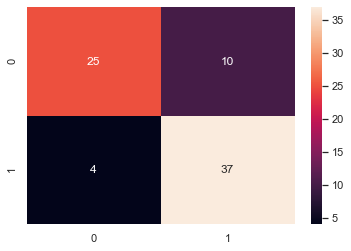

In [40]:
# Revisited confusion matrix
cm=confusion_matrix(y_test,lgr_t.predict(x_test))
sns.heatmap(cm,annot=True,xticklabels=True,yticklabels=True)
TN=cm[0,0]
TP=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]
X= 'YTEST'
Y='YPRED'

In [41]:
#Classification Accuracy:
CA=(TP+TN)/(TP+TN+FP+FN)
print(f"Classification Accuracy: {CA}") # Model classified that much percent of data accurately



#Classification Error:
CE=(FP+FN)/(TP+TN+FP+FN)
print(f"Classification Error: {CE}") # Model does not classified that much percent of data accurately

Classification Accuracy: 0.8157894736842105
Classification Error: 0.18421052631578946


After tuning score becomes better and classification accuracy also increased.

### Results & Conclusion:

1. The logistic regression model accuracy score is 0.8502. So, the model does a very good job in predicting whether or not patient has heart disease.

2. Small number of observations predict that patient has no heart disease. Majority of observations predict that patient has heart disease.

3. The model shows no signs of overfitting and underfitting.

4. Decreasing the value of C i.e. C=0.1 results in higher test set accuracy and also a slightly change in training set accuracy. So, we can conclude that a more regulated model should perform better.

5. Increasing the threshold level results in increased accuracy.

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether patient has heart disease or not.

7. Our original model accuracy score is 0.8502 whereas accuracy score after RFECV is 0.8370. So, we can obtain accuracy reduced but with reduced set of features.

8. Our original model test accuracy is 0.8502 while GridSearch CV accuracy is 0.8414.  whereas original test score is 0.8026 and hypertuned model test score is 0.8157 so we can obtain that RandomizedSearchCV improve the performance for this particular model.